In [2]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')

df


date  likes  comments  \
0     2022-01-03     11       210   
1     2022-01-03     10       210   
2     2022-01-03      7        70   
3     2022-01-03     11       220   
4     2022-01-04     12         0   
...          ...    ...       ...   
5627  2022-07-21     24        30   
5628  2022-07-21      1        40   
5629  2022-07-21      0        40   
5630  2022-07-21      1        40   
5631  2022-07-21      0        50   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
5627  https://mbasic.facebook.com/groups/32275791783...   
5628  https://mbasic.facebook.com/groups/32275791783...   
5629  https://mbasic.facebook.com/groups/32275791783...   
5630  https://mbasic.facebook.com/groups/32275791783...   
5631  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ü–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ PK...   
1     –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç. –ú–æ–∂–µ—Ç —É –∫–æ–≥–æ-—Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è...   
2     –ö—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ). –í–æ–æ–±—â–µ, —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª, —á—Ç–æ –æ–±—ã—á...   
4     –ö—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç, –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª...   
...                                                 ...   
5627  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞—è —Å–∏—Ç—É–∞...   
5628  –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞,–∏–∑ –¢–µ—Ä–µ—Å–ø–æ–ª—è –≤ –ë—Ä–µ—Å—Ç,–∫—Ä–æ...   
5629  –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –∫—Ç–æ-–Ω–∏–±—É–¥—å –∑–Ω–∞–µ—Ç, –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–≤–∏—Ç...   
5630  –î–æ–±—Ä–∞–≥–∞ –¥–Ω—è, —à–∞–Ω–æ—û–Ω—ã—è ! –ú–æ–∂–∞ —Ç—É—Ç –Ω–µ—Ö—Ç–∞ –ø—Ä–∞—Ü—É–µ ...   
5631  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –≥–¥–µ –æ—Ñ–æ—Ä–º–∏—Ç—å –¥–æ–≤–µ—Ä–µ–Ω–Ω–æ...   

                                          preproccessed  \
0     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ü–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ PKO...   
1     –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ú–æ–∂–µ—Ç —É –∫–æ–≥–æ —Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è ...   
2     –ö—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ –í–æ–æ–±—â–µ —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª —á—Ç–æ –æ–±—ã—á–Ω–æ –µ...   
4     –ö—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª—å...   
...                                                 ...   
5627  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞—è —Å–∏—Ç—É–∞—Ü...   
5628  –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∏–∑ –¢–µ—Ä–µ—Å–ø–æ–ª—è –≤ –ë—Ä–µ—Å—Ç –∫—Ä–æ...   
5629  –î–æ–±—Ä—ã–π –¥–µ–Ω—å –∫—Ç–æ –Ω–∏–±—É–¥—å –∑–Ω–∞–µ—Ç –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–≤–∏—Ç—å ...   
5630  –î–æ–±—Ä–∞–≥–∞ –¥–Ω—è —à–∞–Ω–æ—û–Ω—ã—è –ú–æ–∂–∞ —Ç—É—Ç –Ω–µ—Ö—Ç–∞ –ø—Ä–∞—Ü—É–µ —û —Ç...   
5631  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –≥–¥–µ –æ—Ñ–æ—Ä–º–∏—Ç—å –¥–æ–≤–µ—Ä–µ–Ω–Ω–æ—Å...   

                                              text_prep  \
0     –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ pko...   
1     –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç –º–æ–∂–µ—Ç —É –∫–æ–≥–æ —Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è ...   
2     –∫—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ –≤–æ–æ–±—â–µ —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª —á—Ç–æ –æ–±—ã—á–Ω–æ –µ...   
4     –∫—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª—å...   
...                                                 ...   
5627  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—

In [5]:
import requests
from bs4 import BeautifulSoup 
import time
from urllib.parse import urlparse, urljoin
from tqdm.notebook import tqdm
import pickle 
import spacy 
import ru_core_news_sm 
import string 
import nltk 

In [6]:
nlp = ru_core_news_sm.load() 

In [7]:
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]

In [8]:
stopwords=russian_stopwords

In [9]:
# Parser for reviews
punctuations = string.punctuation
#stopwords = stopwords

def spacy_processor(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens


In [10]:
text_data = [spacy_processor(text) for text in tqdm(df['text_lemm'])]

  0%|          | 0/5632 [00:00<?, ?it/s]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, 
                             min_df=2, 
                             ngram_range=(1,2),
                             max_features=5000)
data_vectorized = vectorizer.fit_transform(text_data)


In [12]:
data_vectorized[0].todense().shape

(1, 5000)

In [13]:
import pandas as pd
pd.DataFrame(data_vectorized.todense(), 
             columns=vectorizer.get_feature_names())

adobe   al  and  anna  app  app viber  apple  are  art  art ust  ...  \
0       0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
1       0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
2       0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
3       0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
4       0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
...     ...  ...  ...   ...  ...        ...    ...  ...  ...      ...  ...   
5627    0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
5628    0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
5629    0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
5630    0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   
5631    0.0  0.0  0.0   0.0  0.0        0.0    0.0  0.0  0.0      0.0  ...   

      —û–¥–∑—è—á–Ω—ã  —û–∂–æ  —û–∫—Ä–∞—ñ–Ω–µ  —û–º–æ–≤—ã  —û—Å–µ  —û—Å—ë  —û—Å—ñ–º  —û—Å—ñ–º –ø–∞–¥–∫–∞–∂—ã—Ü–µ  —û—Å—ñ—Ö  \
0         0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
1         0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
2         0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
3         0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
4         0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
...       ...  ...      ...    ...  ...  ...   ...             ...   ...   
5627      0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
5628      0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
5629      0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
5630      0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   
5631      0.0  0.0      0.0    0.0  0.0  0.0   0.0             0.0   0.0   

      —û—Ü–µ–∫–∞—á–æ—û  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
5627       0.0  
5628       0.0  
5629       0.0  
5630       0.0  
5631       0.0  

[5632 rows x 5000 columns]

In [14]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF

NUM_TOPICS = 15

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                max_iter=15, 
                                learning_method='online', 
                                verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [15]:
def print_topics(model, vectorizer, n_words=15):
    for idx, topic in enumerate(model.components_):
        print()
        print(f'Topic {idx}:', [(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-n_words - 1:-1]]) 

In [16]:
nmf.components_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.29185030e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.58497353e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80249693e-03, 1.87696849e-02, 8.02174695e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.39461051e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
nmf.components_.shape

(15, 5000)

In [18]:
data_vectorized.shape

(5632, 5000)

In [19]:
#the most characteristic word for topic 
np.argmax(nmf.components_[8])

587

In [21]:
vectorizer.get_feature_names()[587]

'–±–∞–Ω–∫'

In [22]:
print_topics(nmf, vectorizer)


Topic 0: [('–≤–∏–∑–∞', 3.9552396187443732), ('–≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–π', 1.316620667754554), ('–ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ', 1.2033751528514125), ('–≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–π –≤–∏–∑–∞', 1.170644119321149), ('—Ä–∞–±–æ—á–∏–π', 0.955061284295656), ('—Ä–∞–±–æ—á–∏–π –≤–∏–∑–∞', 0.7984770369562155), ('–∑–∞–∫–∞–Ω—á–∏–≤–∞—Ç—å—Å—è', 0.46653953633978523), ('–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è', 0.39425852344809004), ('–ø—Ä–æ–¥–ª—è—Ç—å', 0.3721244676052281), ('–ø–æ–¥–∞–≤–∞—Ç—å—Å—è', 0.35928737202060756), ('–ø–æ–ª—å—à–∞', 0.3537310082000272), ('–≤—ã–µ–∑–∂–∞—Ç—å', 0.33665170721143645), ('–ø–æ–¥–∞—á–∞', 0.3219420648995027), ('–æ—Ç–∫—Ä—ã–≤–∞—Ç—å', 0.31437593384027473), ('–≤–∏–∑–æ–≤—ã–π', 0.3088137824701674)]

Topic 1: [('–≤–∞—Ä—à–∞–≤–∞', 2.203245150773081), ('–ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å', 0.1833621344844025), ('–∫—É–ø–∏—Ç—å', 0.12891399126333028), ('–º–∞–≥–∞–∑–∏–Ω', 0.10787224214900622), ('–∂–∏–ª—å—ë', 0.1044338265702113), ('–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è', 0.10432036766942733), ('—Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω—ã–π', 0.10248250861089885), ('–

In [23]:
print_topics(lsi, vectorizer)


Topic 0: [('–≤–∏–∑–∞', 0.30663721997069887), ('–≤–∞—Ä—à–∞–≤–∞', 0.290992001415854), ('–ø–æ–ª—å—à–∞', 0.2832402015345445), ('–±–µ–ª–∞—Ä—É—Å—å', 0.21887787206353004), ('–∫–∞—Ä—Ç–∞', 0.20716956113819932), ('–ø–æ–ª—å—Å–∫–∏–π', 0.17899556824910715), ('—Ä–±', 0.17413450764443583), ('–µ—Ö–∞—Ç—å', 0.17364290354595735), ('–≥—Ä–∞–Ω–∏—Ü–∞', 0.14214064107331412), ('–º–∏–Ω—Å–∫', 0.13519296722417282), ('–ø–æ–±—ã—Ç', 0.11963593527191843), ('–ø–æ–º–æ–≥–∞—Ç—å', 0.11297488154926777), ('–ø–æ–ª—è–∫', 0.10413532256716025), ('–ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ', 0.10325542358314559), ('–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è', 0.10287315643317986)]

Topic 1: [('–≤–∞—Ä—à–∞–≤–∞', 0.4721932484003257), ('–µ—Ö–∞—Ç—å', 0.3012403377308698), ('–º–∏–Ω—Å–∫', 0.2764157223673858), ('–ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å', 0.1762064213554547), ('–º–∏–Ω—Å–∫ –≤–∞—Ä—à–∞–≤–∞', 0.12221219060698714), ('–±–ª–∏–∑–∫–∏–π', 0.11955660656925657), ('–≤–∞—Ä—à–∞–≤–∞ –º–∏–Ω—Å–∫', 0.1128791289667799), ('–µ—Ö–∞—Ç—å –≤–∞—Ä—à–∞–≤–∞', 0.09953267300427052), ('–±—Ä–µ—Å—Ç', 0.0814601190721

In [24]:
print_topics(lda, vectorizer)


Topic 0: [('–ª–∏—á–Ω—ã–π —Å–æ–æ–±—â–µ–Ω–∏–µ', 9.874787807514636), ('—Å–æ–æ–±—â–µ–Ω–∏–µ', 8.624099380997274), ('—É–∫—Ä–∞–∏–Ω–∞', 7.969907393057927), ('–ø—Ä–æ–¥–∞–≤–∞—Ç—å', 7.58789360353932), ('–≤–µ–ª–æ—Å–∏–ø–µ–¥', 6.445797454894567), ('–∫—Ä–∞–∫–æ–≤', 6.4273065400940865), ('–ª–∏—á–Ω—ã–π', 6.20872588463787), ('–ø—Ä–∏–≥–æ—Ä–æ–¥', 6.095405371566524), ('–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å', 5.342245313832494), ('–∫–æ—Ä–æ–±–∫–∞', 5.249710035008189), ('–ø–æ–∫—É–ø–∞—Ç—å', 4.914214560917552), ('–¥–æ–∑–≤–∞–Ω–∏–≤–∞—Ç—å—Å—è', 4.740308212715231), ('—Ç–æ–≤–∞—Ä', 4.561872169947356), ('–≥–¥–∞–Ω—å—Å–∫', 4.420162121683681), ('–ø–æ–ø–∞–¥–∞—Ç—å', 4.2090019358492725)]

Topic 1: [('–µ—Ö–∞—Ç—å', 51.868416966381005), ('–º–∏–Ω—Å–∫', 48.03026394892406), ('–≤–∞—Ä—à–∞–≤–∞', 39.34270713701061), ('–ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å', 29.405356747898427), ('–±—Ä–µ—Å—Ç', 26.90534020602351), ('–±–ª–∏–∑–∫–∏–π', 21.649521352325515), ('–∑–∞–≤—Ç—Ä–∞', 19.462364459900957), ('–∞–≤—Ç–æ–±—É—Å', 18.72733256612026), ('–º–∏–Ω—Å–∫ –≤–∞—Ä—à–∞–≤–∞', 18.2449000

In [43]:
#Visualisation of NMF

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import random
import pandas as pd

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [44]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_nmf, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [45]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [46]:
source.head()

x_umap     y_umap     x_tsne     y_tsne  topic    color
0  14.905121  10.907146  34.424026 -42.214764      8  #07278E
1  14.665751   7.352777   1.444762 -36.208858      6  #AEC2BE
2  11.353724   6.939977  14.362604   5.149408     10  #FC5DD5
3  14.651814   7.099864   1.608856 -35.350124      6  #AEC2BE
4  11.301749   6.247120 -34.767757  26.333559      1  #00AD30

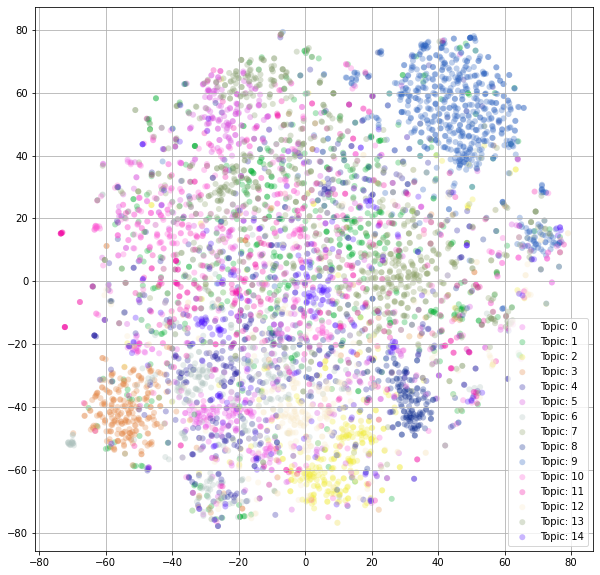

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

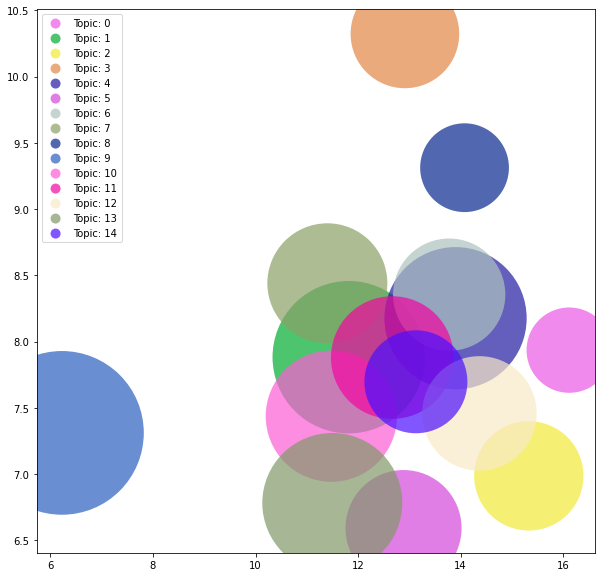

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [49]:
#Visualisation of LSI

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [50]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lsi, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [52]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [53]:
source.head()

x_umap     y_umap     x_tsne     y_tsne  topic    color
0  14.905121  10.907146  34.424026 -42.214764      8  #DDC9AE
1  14.665751   7.352777   1.444762 -36.208858      6  #ADD0FA
2  11.353724   6.939977  14.362604   5.149408     13  #684930
3  14.651814   7.099864   1.608856 -35.350124      6  #ADD0FA
4  11.301749   6.247120 -34.767757  26.333559      0  #6E6633

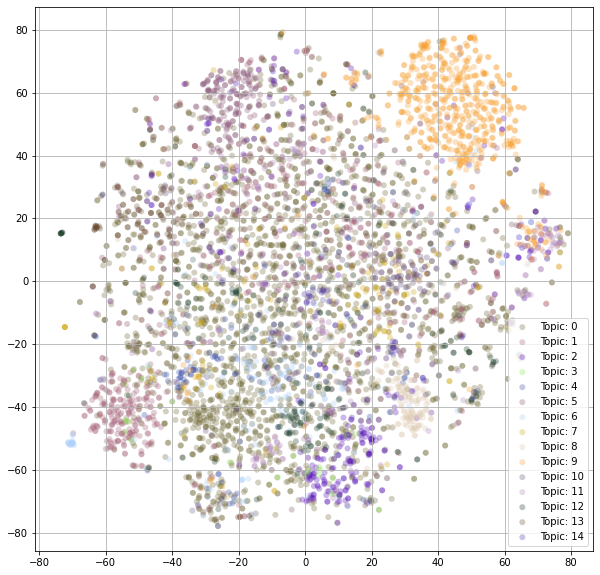

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

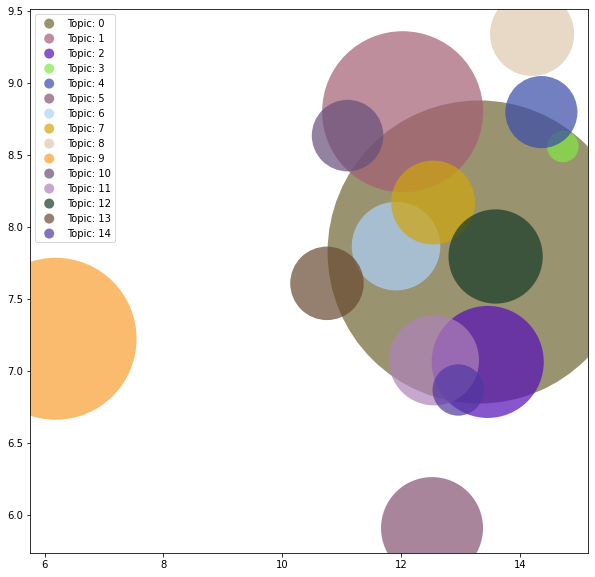

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [56]:
#Visualisation of LDA

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [57]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lda, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [58]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

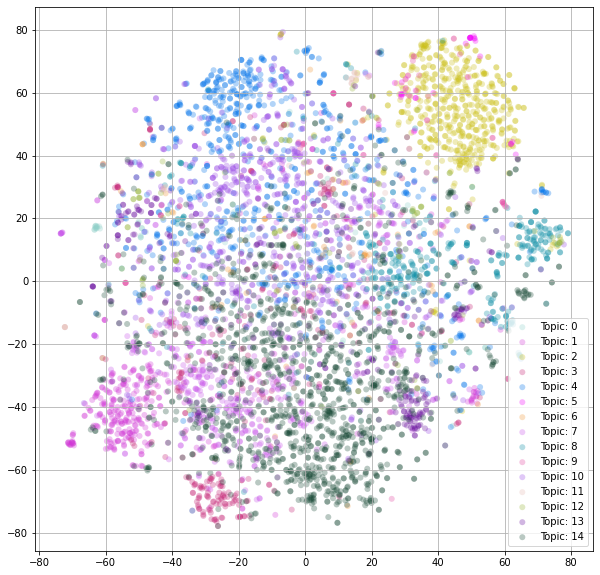

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

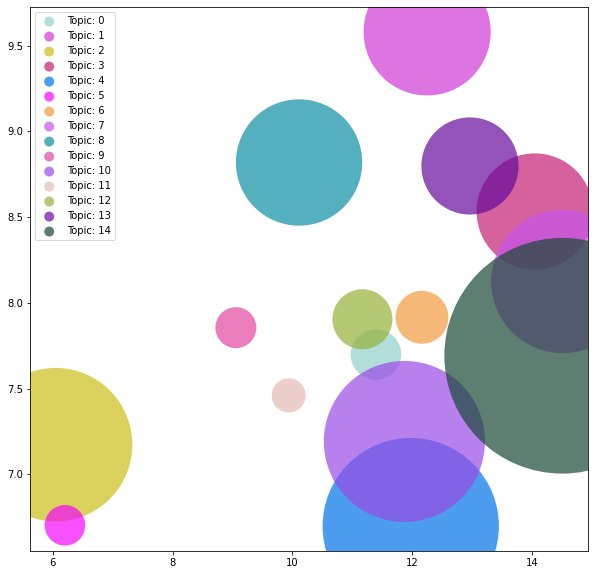

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [42]:
import numpy as np
new_text = '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –¥–æ—Ä–æ–≥–∏–µ –∑–µ–º–ª—è–∫–∏! –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –º–æ–∂–Ω–æ –ª–∏ –Ω–∞—Ö–æ–¥—è—Å—å –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –ü–æ–ª—å—à–∏ –ø–æ —Ä–∞–±–æ—á–µ–π –¥–µ–π—Å—Ç–≤—É—é—â–µ–π –≤–∏–∑–µ, –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω—É –†–ë, –ø–æ–µ—Ö–∞—Ç—å –≤ –ì–µ—Ä–º–∞–Ω–∏—é –ø–æ–µ–∑–¥–æ–º? –ü—Ä–æ–≤–µ—Ä—è—é—Ç –ª–∏ –ø–∞—Å–ø–æ—Ä—Ç–∞ —É –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –∏ –≤–æ–æ–±—â–µ  –∑–∞–∫–æ–Ω–Ω–æ –ª–∏ —ç—Ç–æ? –ù–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É—é—Å—å —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –≤ —Ç–µ–ø–µ—Ä–µ—à–Ω–µ–π —Å–∏—Ç—É–∞—Ü–∏–∏. –ë—É–¥—É –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞ –∑–∞ –ª—é–±—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.'
new_corpus = [new_text]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

6

In [33]:
new_text2 = '–î–µ–ª—é—Å—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π, –µ—Å–ª–∏ –∫–æ–º—É-—Ç–æ –±—É–¥–µ—Ç –ø–æ–ª–µ–∑–Ω–æ: –°–µ–≥–æ–¥–Ω—è –∑–∞–±—Ä–∞–ª–∞ umiejscowienie aktu urodzenia. –î–µ–ª–∞–ª–æ—Å—å 1 –º–µ—Å—è—Ü, –≤–ø–∏—Å–∞–ª–∏ –¥–µ–≤–∏—á—å—é —Ñ–∞–º–∏–ª–∏—é –º–∞—Ç–µ—Ä–∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Å–ø—Ä–∞–≤–∫–∏ –∏–∑ –∑–∞–≥—Å–∞ –æ –∑–∞–∫–ª—é—á–µ–Ω–∏–∏ –±—Ä–∞–∫–∞ —Ä–æ–¥–∏—Ç–µ–ª–µ–π. –°–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤ –æ—Ç—Ü–∞ –∏ –º–∞—Ç–µ—Ä–∏ –Ω–µ –ø—Ä–æ—Å–∏–ª–∏ –¥–∞–∂–µ –ø–æ–∫–∞–∑–∞—Ç—å.UrzƒÖd sranu cywilnego w Starych Babicach. –ó–∞–ø–∏—Å—ã–≤–∞–ª–∞—Å—å –≤ –∫–æ–Ω—Ü–µ –∏—é–ª—è –Ω–∞ –∫–æ–Ω–µ—Ü —Å–µ–Ω—Ç—è–±—Ä—è'
new_corpus = [new_text2]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

12

In [34]:
new_text3 = '–í—Å–µ–º –ø—Ä–∏–≤–µ—Ç. –¢—É—Ç –≤ –≥—Ä—É–ø–ø–µ —É–ø–æ–º–∏–Ω–∞–ª–∏ —á–∞—Ç-–±–æ—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –∂–∏–ª—å—è. –ú–æ–∂–µ—Ç –∫—Ç–æ-–Ω–∏–±—É–¥—å –¥–∞—Ç—å —Å—Å—ã–ª–∫—É –Ω–∞ –Ω–µ–≥–æ? –ù–µ —Å–æ—Ö—Ä–∞–Ω–∏–ª–∞ —Å—Ä–∞–∑—É. –ê —Å–µ–π—á–∞—Å –ø–æ –ø–æ–∏—Å–∫—É –ø—Ä–æ–±–æ–≤–∞–ª–∞ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, –Ω–µ –Ω–∞—à–ª–∞ ü•∫ –ë—É–¥—É –æ—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞'
new_corpus = [new_text3]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [35]:
new_text4 ='–í –Ω–æ–≤—ã–π —Å–∞–ª–æ–Ω –≤ –í–∞—Ä—à–∞–≤–µ —Ç—Ä–µ–±—É—é—Ç—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏: –º–∞—Å—Å–∞–∂–∏—Å—Ç (–∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π, –ª–∏–º—Ñ–æ–¥—Ä–µ–Ω–∞–∂–Ω—ã–π, –∞–Ω—Ç–∏—Ü–µ–ª–ª—é–ª–∏—Ç–Ω—ã–π) –∏ –∫–æ—Å–º–µ—Ç–æ–ª–æ–≥. –û—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ. –ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ 4500 –∑–ª–æ—Ç—ã—Ö –Ω–µ—Ç—Ç–æ. –†–∞–±–æ—Ç–∞ –≤ –¥–≤–µ —Å–º–µ–Ω—ã  –ø–æ 8 —á–∞—Å–æ–≤ –≤ –¥–µ–Ω—å. ( –ì—Ä–∞—Ñ–∏–∫ –æ–±—Å—É–∂–¥–∞–µ–º) –ü–µ—Ä–µ—Ä—ã–≤ –º–µ–∂–¥—É –º–∞—Å—Å–∞–∂–∞–º–∏ 30 –º–∏–Ω—É—Ç.üôèüèΩ–ó–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã–º –ø–∏—Å–∞—Ç—å –≤ –ª–∏—á–∫—É'
new_corpus = [new_text4]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

10

In [36]:
new_text5 ='–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ú–æ–∂–Ω–æ –ª–∏ —É—Å—Ç—Ä–æ–∏—Ç—å—Å—è –Ω–∞ —Ä–∞–±–æ—Ç—É –≤ —à–∫–æ–ª–µ —É—á–∏—Ç–µ–ª–µ–º –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞,  –∏–º–µ—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –†–ë –∏ –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –≤ —à–∫–æ–ª–µ –†–ë.–∑–Ω–∞–Ω–∏–µ –ø–æ–ª—å—Å–∫–æ–≥–æ –∏–º–µ–µ—Ç—Å—è –ë1 –∑–¥–∞–Ω –µ–∫–∑–∞–º–µ–Ω'
new_corpus = [new_text5]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

6

In [37]:
next_text7 ='–î–æ–±—Ä–æ–≥–æ –¥–Ω—è –≤—Å–µ–º. –ü—Ä–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –ø–æ—Å—Ç—ã –Ω–∞ —Ç–µ–º—É. –ü—Ä–æ—à—É –Ω–µ –ø—É—Ç–∞—Ç—å –ø—Å–∏—Ö–∏–∞—Ç—Ä–∞ –∏ –ø—Å–∏—Ö–æ–ª–æ–≥–∞. –ù–∞–º –Ω—É–∂–µ–Ω –≤—Ä–∞—á –ø—Å–∏—Ö–∏–∞—Ç—Ä, –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è –ø–æ –°–î–í–ì( —Å–∏–Ω–¥—Ä–æ–º –¥–µ—Ñ–µ—Ü–∏—Ç–∞ –≤–Ω–∏–º–∞–Ω–∏—è –≥–∏–ø–µ—Ä–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å). –ü–æ–¥—Ä–æ—Å—Ç–æ–∫. –í–æ–∑–º–æ–∂–Ω–æ –∫—Ç–æ —Ç–æ –≤ –í–∞—Ä—à–∞–≤–µ —É–∂–µ –æ–±—Ä–∞—â–∞–ª—Å—è –∫ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—É —Å —Ç–∞–∫–∏–º –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º –∑–∞–ø—Ä–æ—Å–æ–º. –ó–∞—Ä–∞–Ω–µ–µ –±–ª–∞–≥–æ–¥–∞—Ä—é.'
new_corpus = [next_text7]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

13

In [38]:
next_text8 ='–í—Å–µ–º –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ú–æ–∂–µ—Ç –µ—Å—Ç—å —Å–æ–æ—Ç–µ—á–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–∏ —Å —Ñ–∏—Ä–º–æ–π –ø–æ –∏–∑–≥–æ—Ç–æ–≤–ª–µ–Ω–∏—é –º–µ–±–µ–ª–∏. –ù—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –∫–∞—Ä–∫–∞—Å –∫—Ä–æ–≤–∞—Ç–∏ –Ω–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π 140-190.'
new_corpus = [next_text8]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

14

In [39]:
next_text9 ='–î–æ–±—Ä–æ–≥–æ –¥–Ω—è –≤—Å–µ–º. –ü–æ –ø—Ä–æ—Å—å–±–µ —Ö–æ–∑—è–µ–≤ –ø—É–±–ª–∏–∫—É—é –æ–±—ä—è–≤–ª–µ–Ω–∏–µ. –°–¥–∞–µ—Ç—Å—è 3—Ö –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ –í–∞—Ä—à–∞–≤–µ/Wola. 65–∫–≤/–º. –ú–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –µ—Å—Ç—å –≤—Å—è —Ç–µ—Ö–Ω–∏–∫–∞, –æ–≥—Ä–æ–º–Ω—ã–π –±–∞–ª–∫–æ–Ω (20–∫–≤/–º). –º–µ—Å—Ç–æ –≤ –ø–æ–¥–∑–µ–º–Ω–æ–º –ø–∞—Ä–∫–∏–Ω–≥–µ.–ü–æ –æ–ø–ª–∞—Ç–µ 6000 PLN –∑–∞ –≤—Å–µ, –≤–∫–ª—é—á–∞—è –≤–æ–¥—É/—ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ/–∏–Ω—Ç–µ—Ä–Ω–µ—Ç.–ü—Ä–æ–∂–∏–ª–∏ —Ç–∞–º –ø–æ–ª–≥–æ–¥–∞ - —Ç–µ–ø–ª–æ, —Å–æ—Å–µ–¥–µ–π –Ω–µ —Å–ª—ã—à–Ω–æ, –ø—Ä–æ–±–ª–µ–º –≤–æ–æ–±—â–µ –Ω–∏–∫–∞–∫–∏—Ö. –°—å–µ–∑–∂–∞–µ–º —Ç–æ–ª—å–∫–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç —Ä–∞–π–æ–Ω.'
new_corpus = [next_text9]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

7

In [40]:
next_text10 ='–î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä! –£ –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å, –≤—ä–µ—Ö–∞–ª–∞ –≤ –ü–æ–ª—å—à—É –ø–æ —Ä–∞–±–æ—á–µ–π –≤–∏–∑–µ, —Å –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ–º —Ä–∞–±–æ—á–∏–º, –Ω–æ –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏—é –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞, –¥–≤–µ –Ω–µ–¥–µ–ª–∏ –Ω–∞–∑–∞–¥ –≤—ã–µ—Ö–∞–ª–∞ –∏–∑ —Å—Ç—Ä–∞–Ω—ã –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –∫–∞–∫–∏–µ –º–Ω–µ –Ω—É–∂–Ω—ã –¥–æ–∫—É–º–µ–Ω—Ç—ã —Å–µ–π—á–∞—Å –¥–ª—è –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è –≥—Ä–∞–Ω–∏—Ü—ã? –∑–∞—Ä–∞–Ω–µ–µ –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞ –∑–∞ –æ—Ç–≤–µ—Ç—ã'
new_corpus = [next_text10]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

0

In [66]:
# Getting the wordclouds from topics
max_df = 0.95 
min_df = 2
#max_features= 5000
tv = TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True)
#Fitting count vectorizer 
data_vectorized = vectorizer.fit_transform(text_data)

#getting the terms(features) generated by count vectorizer
terms = vectorizer.get_feature_names()

In [67]:
total_topics =15
# next step is to implement Latent Drichilet Allocation 
# next step is to implement NMF

nmf = NMF(n_components=total_topics)
nmfTransform = nmf.fit_transform(data_vectorized)



# lda = LatentDirichletAllocation(n_components=total_topics, 
#             max_iter=15,learning_method='online', 
#             learning_offset=15,random_state=1234)
# ldaTransform = lda.fit_transform(data_vectorized)

#declaring number of terms we need per topic
terms_count = 25

C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [68]:
vocabulary = vectorizer.get_feature_names()

In [73]:
for i, comp in enumerate(nmf.components_):
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
–≤–∏–∑–∞ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–π –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–π –≤–∏–∑–∞ —Ä–∞–±–æ—á–∏–π —Ä–∞–±–æ—á–∏–π –≤–∏–∑–∞ –∑–∞–∫–∞–Ω—á–∏–≤–∞—Ç—å—Å—è –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –ø—Ä–æ–¥–ª—è—Ç—å –ø–æ–ª—å—à–∞ –ø–æ–¥–∞–≤–∞—Ç—å—Å—è –≤—ã–µ–∑–∂–∞—Ç—å –ø–æ–¥–∞—á–∞ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –≤–∏–∑–æ–≤—ã–π 

Topic 1: 
–≤–∞—Ä—à–∞–≤–∞ –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å –∫—É–ø–∏—Ç—å –º–∞–≥–∞–∑–∏–Ω –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –∂–∏–ª—å—ë —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω—ã–π –ø—Ä–∏–µ–∑–∂–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–µ–∑–∂–∞—Ç—å –≤–∞—Ä—à–∞–≤–∞ —Ü–µ–Ω—Ç—Ä –≤–∞—Ä—à–∞–≤–∞ –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –≤–∞—Ä—à–∞–≤–∞ –º–∏–Ω—Å–∫ –µ—Ö–∞—Ç—å –≤–∞—Ä—à–∞–≤–∞ –≤–∞—Ä—à–∞–≤–∞ –∫—É–ø–∏—Ç—å 

Topic 2: 
–∫–∞—Ä—Ç–∞ –ø–æ–±—ã—Ç –ø–æ–ª—è–∫ –∫–∞—Ä—Ç–∞ –ø–æ–ª—è–∫ –∫–∞—Ä—Ç–∞ –ø–æ–±—ã—Ç –ø–æ–¥–∞–≤–∞—Ç—å—Å—è –ø–æ–¥–∞–≤–∞—Ç—å—Å—è –∫–∞—Ä—Ç–∞ —Å—Ç–∞–ª—ã–π —Å—Ç–∞–ª—ã–π –ø–æ–±—ã—Ç –ø–æ–¥–∞—á–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ–±—ã—Ç –∫–∞—Ä—Ç–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—Ä—Ç–∞ –ø–æ–¥–∞–≤–∞—Ç—å –¥–µ—Ü–∏–∑–∏—è 

Topic 3: 
–µ—Ö–∞—Ç—å –º–∏–Ω—Å–∫ –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –±–ª–

In [74]:
from wordcloud import WordCloud


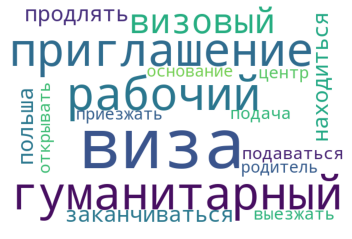

In [95]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = 'viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_word_cloud(0)

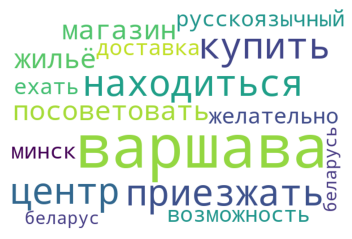

In [96]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(1)

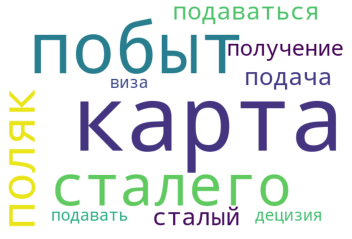

In [97]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(2)

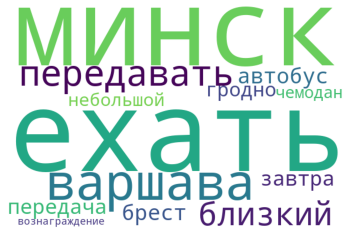

In [98]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(3)

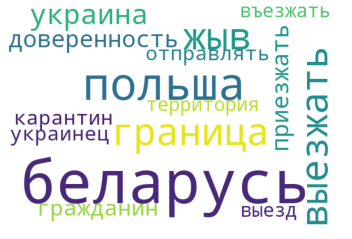

In [99]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(4)

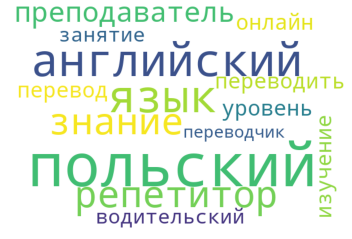

In [100]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(5)

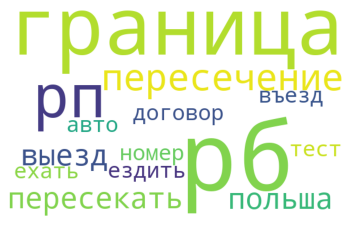

In [101]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(6)

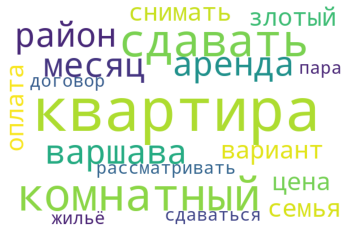

In [102]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(7)

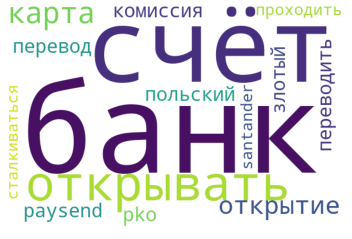

In [103]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(8)

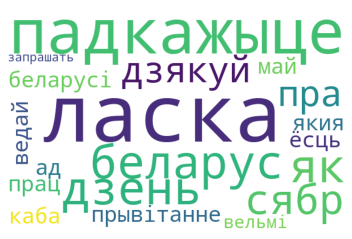

In [104]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(9)

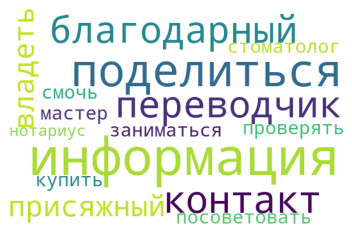

In [105]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(10)

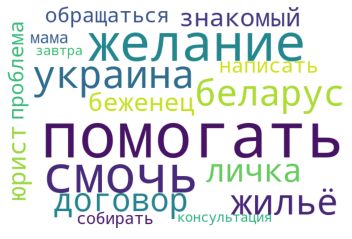

In [106]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(11)

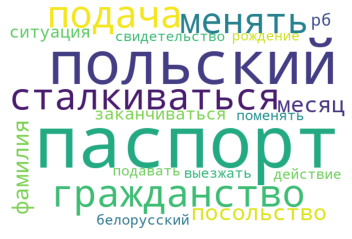

In [107]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(12)

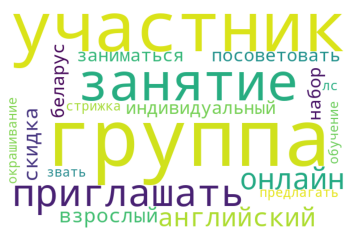

In [108]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(13)

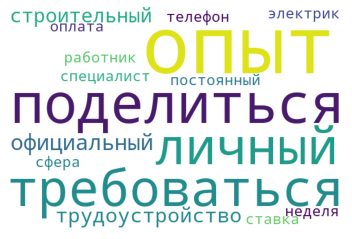

In [109]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(14)